https://www.kaggle.com/code/anurag629/clustring-wine-quality-dataset/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
#Importando o dataset e verificando os valores nas colunas
df_wred = pd.read_csv(r'C:\Users\Matheus\Desktop\Trabalho e Estudos\Python\Exercicios\ml_models\datasets\winequality-red.csv')

display(df_wred.head(3))
df_wred.info()

#Não há nenhuma coluna do tipo object, portanto não será necessário usar o LabelEncoder

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


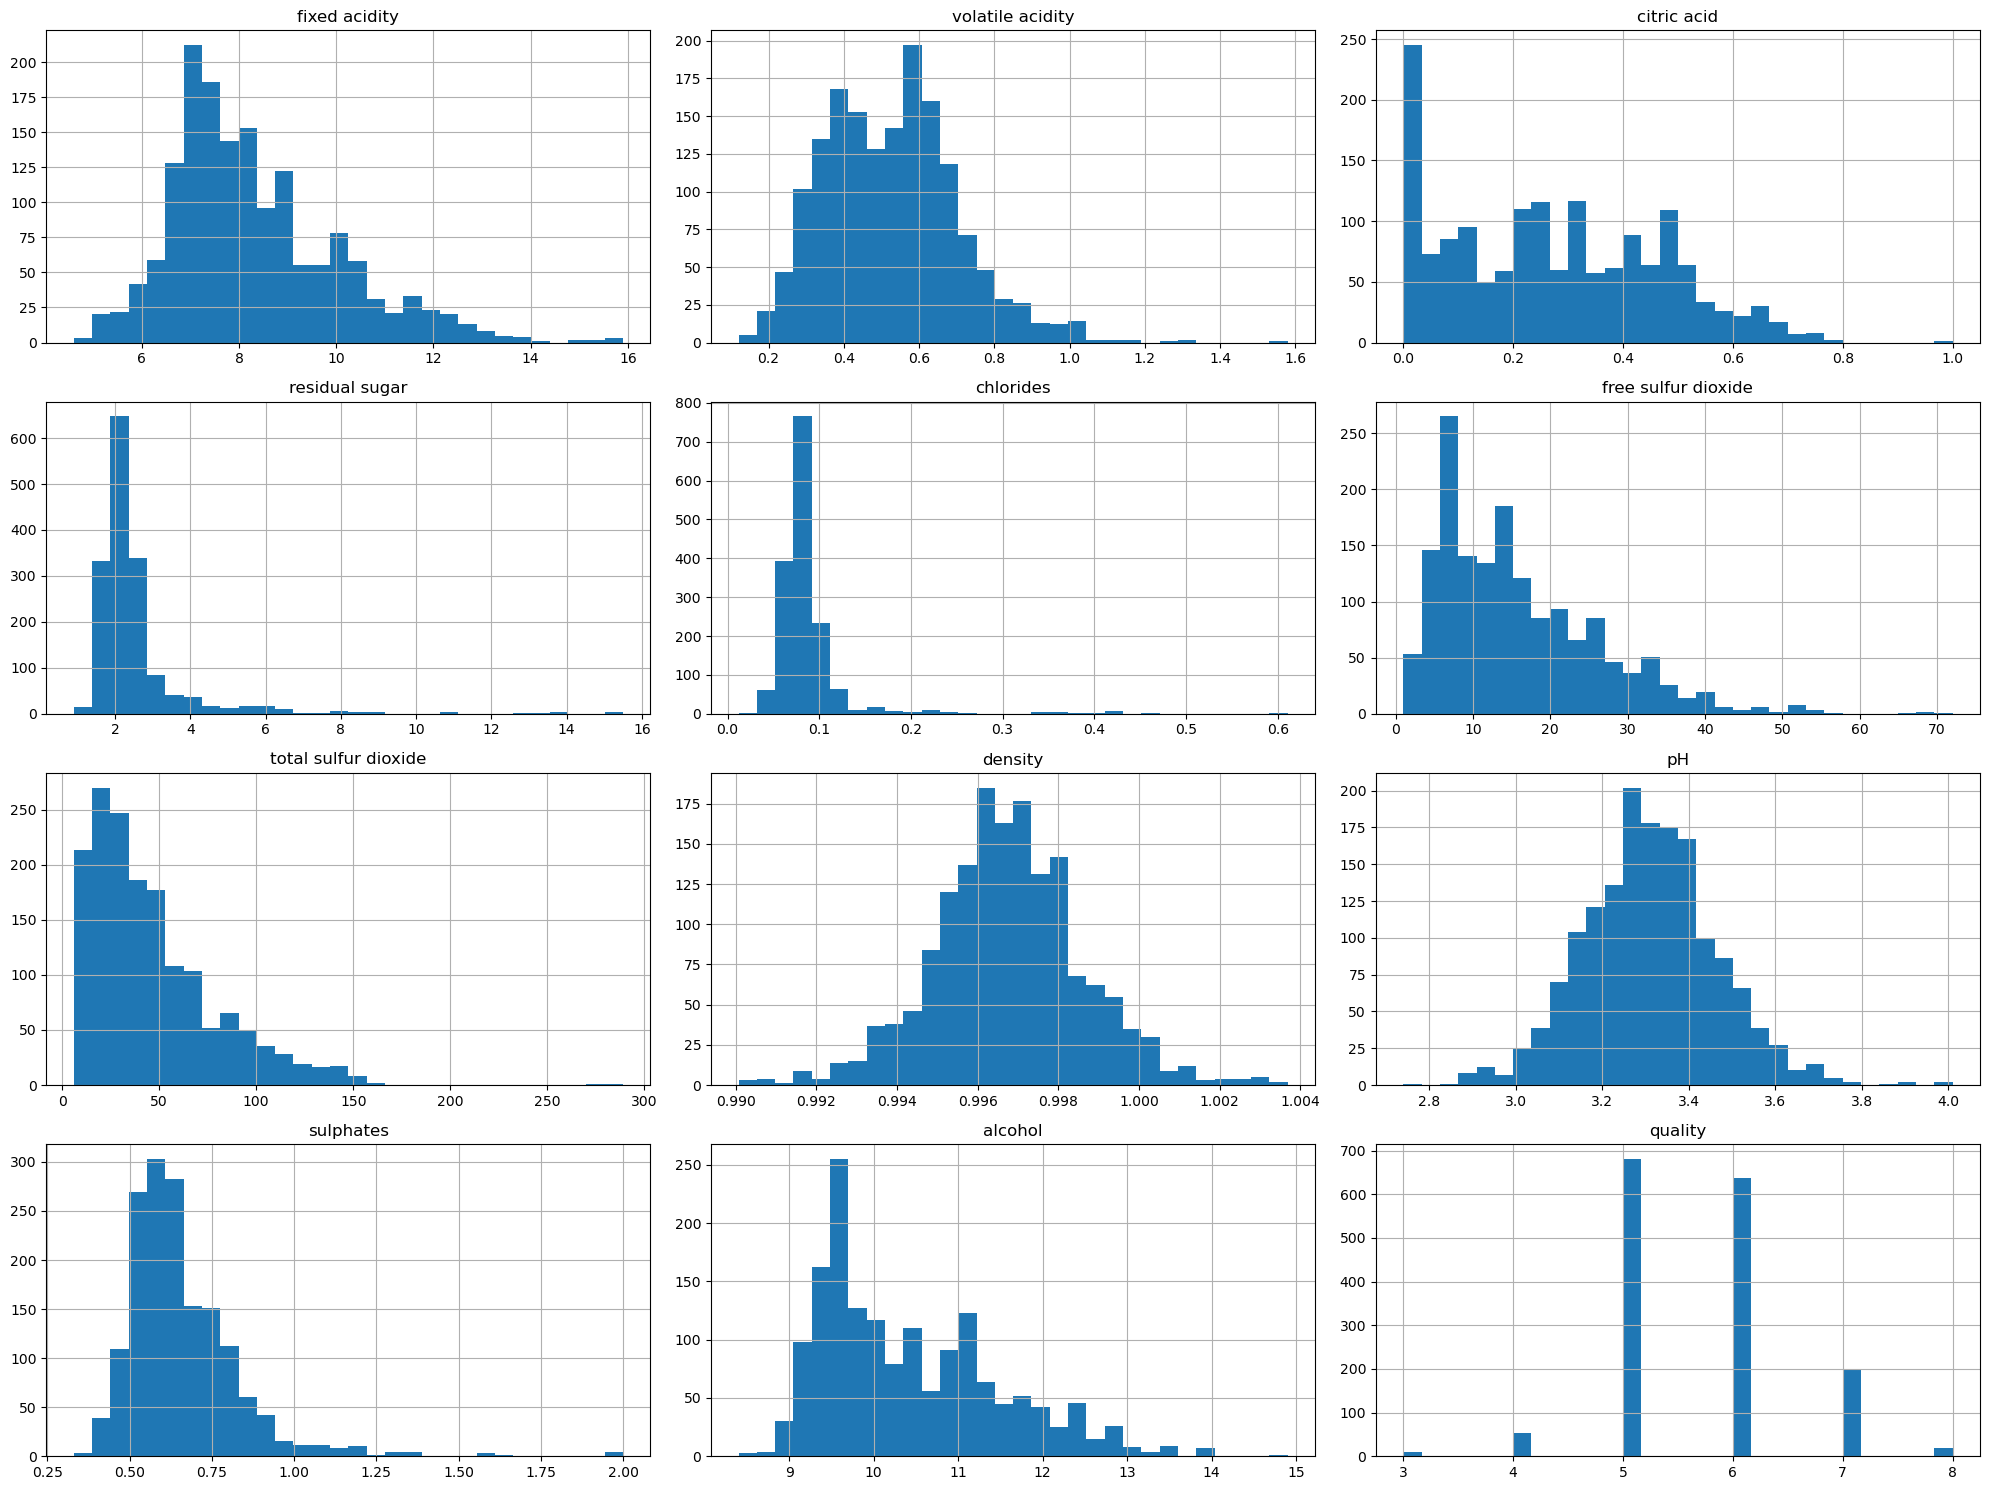

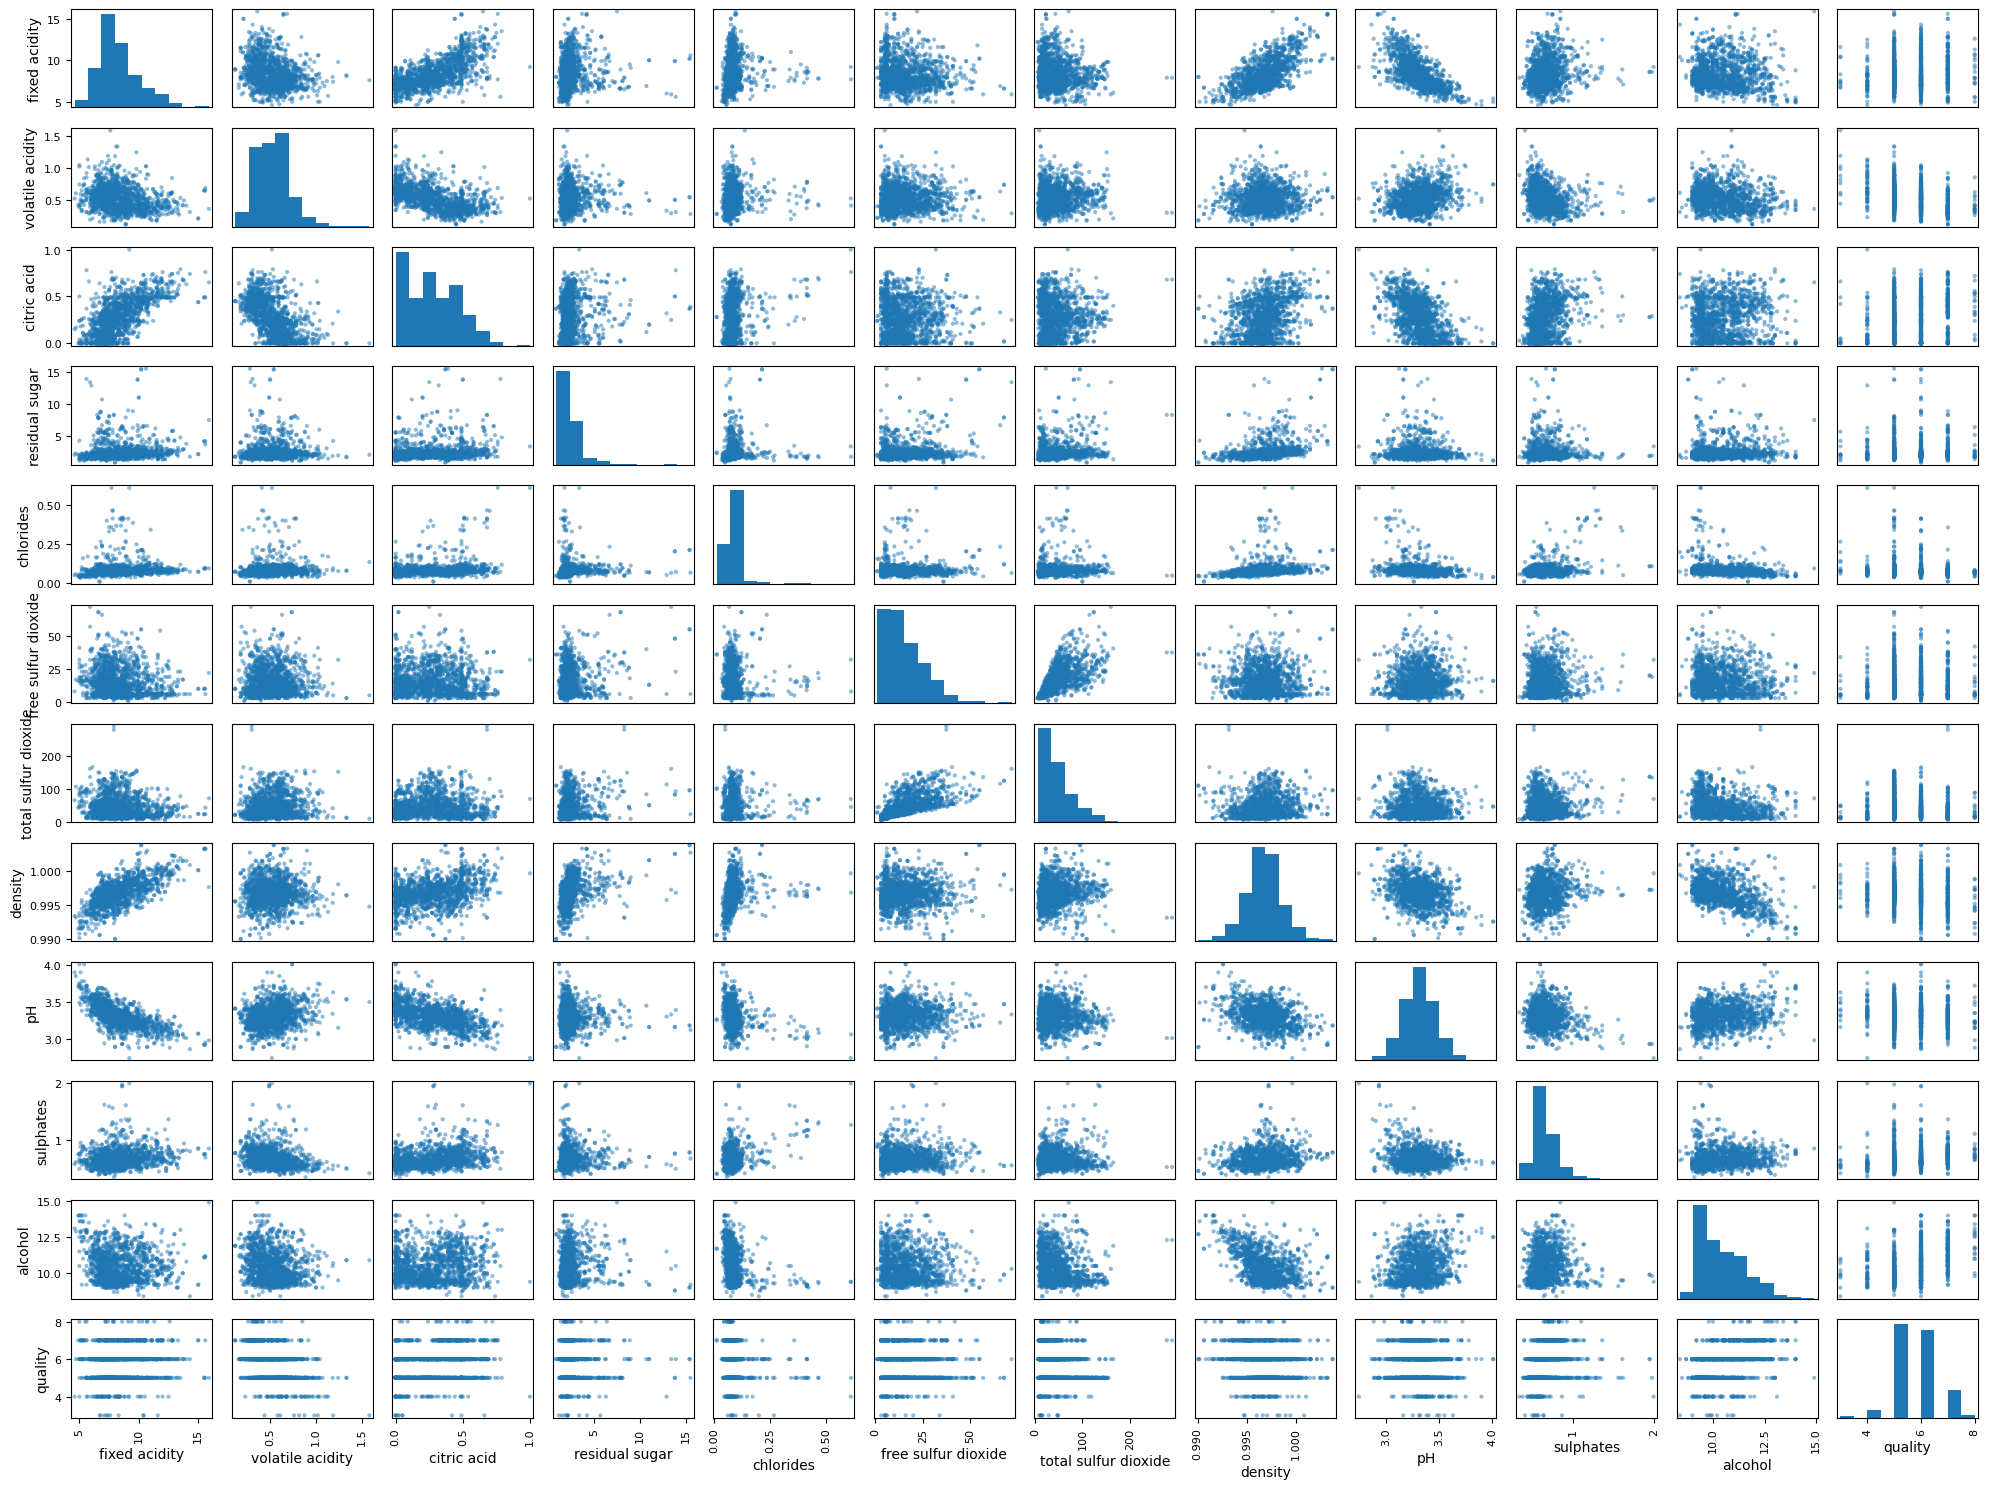

In [3]:
#Verificando quais as relações entre cada coluna do dataset
df_wred.hist(bins = 30, figsize = (20,15))
plt.tight_layout()
plt.show()

pd.plotting.scatter_matrix(df_wred, figsize = (20,15))
plt.tight_layout()
plt.show()

In [9]:
#Criando uma instância do StandardScaler. Este pré processamento é importante pois ele serve para que o modelo não seja muito influênciado por variáveis que podem ter um peso
    #grande no momento de treinar o modelo só porque ela tem um valor mais alto

X_red = df_wred.drop('quality', axis = 1)

scaler = StandardScaler()
km = KMeans(n_clusters = 7, random_state = 42, n_init = 10)

df_scaled = scaler.fit_transform(X_red)

km.fit(df_scaled)

#Criando a previsão usando o modelo KMeans

previsao = km.predict(df_scaled)

#Adicionando a previsão ao dataset
df_wred_predicted = df_wred
df_wred_predicted['cluster_predict'] = previsao

#Visualizando os resultados. Primeiro encontramos os centroids dos clusters, depois encontramos os labels

centroids = km.cluster_centers_
labels = km.labels_

acc = accuracy_score(df_wred_predicted['quality'], df_wred_predicted['cluster_predict'])
print(np.round(acc * 100, 2), '%')

15.2 %


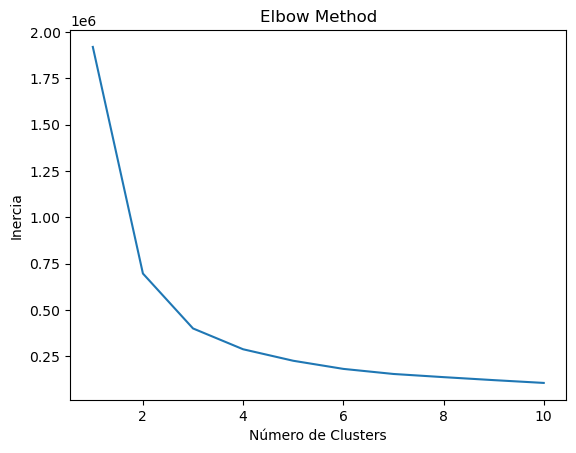

In [10]:
#Usando o metódo Elbow Method para encontrar o melhor numero de clusters para o modelo

inertia = []

for i in range(1,11):
    km_elbow = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    km_elbow.fit(df_wred)
    inertia.append(km_elbow.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [11]:
#Reduzindo a dimensionalidade do modelo para plotar em um gráfico

pca = PCA(n_components = 2)

pca.fit(df_wred)

pca_2d = pca.transform(df_wred)

pca_2d.shape

(1599, 2)

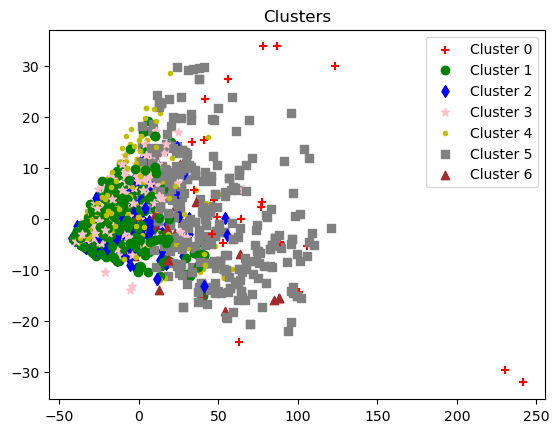

In [16]:
#Plotando o gráfico

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c0 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+'),

    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')

    if km.labels_[i] == 2:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = 'd')
    
    if km.labels_[i] == 3:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'pink', marker = '*')

    if km.labels_[i] == 4:
        c4 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'y', marker = '.')

    if km.labels_[i] == 5:
        c5 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'gray', marker = 's')

    if km.labels_[i] == 6:
        c6 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'brown', marker = '^')

plt.legend([c0, c1, c2, c3, c4, c5, c6], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
plt.title('Clusters')

plt.show()